# Importing libraries and loading the dataset

In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
dataset = pd.read_csv('sales_data.csv')

In [3]:
# checking dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer ID   363 non-null    object 
 1   Order ID      363 non-null    object 
 2   Order Date    363 non-null    object 
 3   Product ID    363 non-null    object 
 4   Product Name  363 non-null    object 
 5   Category      363 non-null    object 
 6   Quantity      363 non-null    int64  
 7   Unit Price    363 non-null    float64
 8   Region        363 non-null    object 
 9   Total Amount  363 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.5+ KB


In [4]:
# checking dataset
dataset.head()

,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount
0,8a80ddb1-8615-4452-adce-db56c9385365,d929f0c8-5600-456b-9360-ae114e339871,2021-12-25,9c485900-229d-4b96-ac99-374754d40e1c,T-shirt,Accessories,2,55.23,North,110.46
1,ac664d43-893a-47a1-bdd7-139f73a360a7,38d57142-b1f3-4b25-ae2e-e7404d2df736,2022-10-08,3ff68652-ba71-4610-9284-71f778fd2819,Smartphone,Clothing,1,217.55,South,217.55
2,ebbc4ba3-d24f-4e25-a585-15c8e6bacbd7,58a7f2a2-5682-4510-b94e-cb56d076880d,2022-11-30,99ad1f2f-fa2e-4b27-8952-7b23249eeebc,T-shirt,Books,5,145.57,West,727.85
3,5f3f88e8-b638-4cfd-9af8-e14b63d9082f,12af190c-f3a3-4209-b7a7-fa7a66337df8,2023-02-12,b767b606-a5c1-46fc-83fa-78de163b8fce,Watch,Clothing,4,11.74,North,46.96
4,2029cf6c-dd8e-430c-ae24-586d3a5f422a,d283a232-0b04-49e9-bad3-6dcfd115b421,2023-02-17,15baeab4-63b9-4b98-a52f-40697bcd0c0f,Watch,Accessories,4,387.85,East,1551.40


# Task 1: Data Cleaning
- Handle any missing values in the dataset.
- Standardize the date format for consistency.
- Remove any duplicate records to ensure data accuracy.

In [5]:
# handle missing values 
dataset = dataset.dropna()

In [6]:
dataset.columns

Index(['Customer ID', 'Order ID', 'Order Date', 'Product ID', 'Product Name',
       'Category', 'Quantity', 'Unit Price', 'Region', 'Total Amount'],
      dtype='object')

In [7]:
dataset.head(3)

,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount
0,8a80ddb1-8615-4452-adce-db56c9385365,d929f0c8-5600-456b-9360-ae114e339871,2021-12-25,9c485900-229d-4b96-ac99-374754d40e1c,T-shirt,Accessories,2,55.23,North,110.46
1,ac664d43-893a-47a1-bdd7-139f73a360a7,38d57142-b1f3-4b25-ae2e-e7404d2df736,2022-10-08,3ff68652-ba71-4610-9284-71f778fd2819,Smartphone,Clothing,1,217.55,South,217.55
2,ebbc4ba3-d24f-4e25-a585-15c8e6bacbd7,58a7f2a2-5682-4510-b94e-cb56d076880d,2022-11-30,99ad1f2f-fa2e-4b27-8952-7b23249eeebc,T-shirt,Books,5,145.57,West,727.85


In [8]:
# standardize date format
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], format='%Y-%m-%d')
dataset['Order Date']

0     2021-12-25
1     2022-10-08
2     2022-11-30
3     2023-02-12
4     2023-02-17
         ...    
358   2023-02-03
359   2021-11-07
360   2022-02-01
361   2023-02-16
362   2022-03-15
Name: Order Date, Length: 363, dtype: datetime64[ns]

In [9]:
# removing duplicates
dataset = dataset.drop_duplicates()

In [10]:
# verify data cleaning
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Customer ID   363 non-null    object        
 1   Order ID      363 non-null    object        
 2   Order Date    363 non-null    datetime64[ns]
 3   Product ID    363 non-null    object        
 4   Product Name  363 non-null    object        
 5   Category      363 non-null    object        
 6   Quantity      363 non-null    int64         
 7   Unit Price    363 non-null    float64       
 8   Region        363 non-null    object        
 9   Total Amount  363 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 31.2+ KB


# Task 2: Customer Segmentation
- Use RFM (Recency, Frequency, Monetary) analysis to segment customers into different groups based on their purchasing behavior.
- Identify key customer segments such as "High-Value Customers," "At-Risk Customers," and "New Customers."

In [11]:
# reference date for recency calculation
reference_date = dataset['Order Date'].max()

# RFM calculation
rfm_table = dataset.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,  # recency
    'Order ID': 'count',  # frequency
    'Total Amount': 'sum'  # monetary
}).reset_index()

rfm_table.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# quantiles for segmentation
quantiles = rfm_table[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

# RFM scoring function
def rfm_score(x, metric, quantiles):
    if metric == 'Recency':
        if x <= quantiles[metric][0.25]:
            return 1
        elif x <= quantiles[metric][0.5]:
            return 2
        elif x <= quantiles[metric][0.75]:
            return 3
        else:
            return 4
    else:
        if x <= quantiles[metric][0.25]:
            return 4
        elif x <= quantiles[metric][0.5]:
            return 3
        elif x <= quantiles[metric][0.75]:
            return 2
        else:
            return 1

# apply RFM score
rfm_table['R_Score'] = rfm_table['Recency'].apply(rfm_score, args=('Recency', quantiles))
rfm_table['F_Score'] = rfm_table['Frequency'].apply(rfm_score, args=('Frequency', quantiles))
rfm_table['M_Score'] = rfm_table['Monetary'].apply(rfm_score, args=('Monetary', quantiles))

# combine scores
rfm_table['RFM_Score'] = rfm_table['R_Score'].map(str) + rfm_table['F_Score'].map(str) + rfm_table['M_Score'].map(str)

# modify the segment classification
rfm_table['Segment'] = rfm_table.apply(
    lambda row: 
    'High-Value' if (row['R_Score'] <= 2 and row['F_Score'] <= 2 and row['M_Score'] <= 2) else
    'At-Risk' if row['R_Score'] >= 3 else
    'New Customer' if row['F_Score'] == 4 else 
    'Other', axis=1
)

# display customer segments
rfm_table['Segment'].value_counts()

New Customer    182
At-Risk         181
Name: Segment, dtype: int64

In [12]:
rfm_table.head()

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,005612ec-5aea-48d6-9a6d-cdf0f538f4da,442,1,720.52,3,4,3,343,At-Risk
1,01329251-44d2-4ed4-b3cb-0d6b13a4712f,184,1,3356.50,1,4,1,141,New Customer
2,015cda0c-7c05-45ab-8438-ac338a7db94c,511,1,1641.24,3,4,2,342,At-Risk
3,018c6e2c-9c84-45e1-991b-9310c5e174a5,254,1,2746.70,2,4,1,241,New Customer
4,02167aaa-8387-4e7e-b1fe-30c87b9a52ed,386,1,2010.51,3,4,2,342,At-Risk


# Task 3: Sales Trend Analysis
- Analyze monthly and yearly sales trends.
- Determine which product categories are performing best.
- Identify the regions with the highest sales.

# Task 4: Data Visualization
- Create visualizations using Matplotlib or Seaborn to represent customer segments and sales trends.
- Include a line chart for sales over time, a bar chart for top product categories, and a pie chart for regional sales distribution.

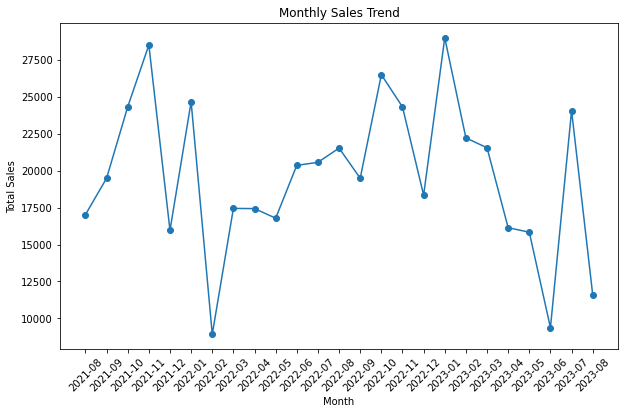

In [13]:
# create a new column for month and year
dataset['Month'] = dataset['Order Date'].dt.to_period('M')

# group by month and sum total sales
monthly_sales = dataset.groupby('Month').agg({'Total Amount': 'sum'})

# plot the monthly sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales['Total Amount'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

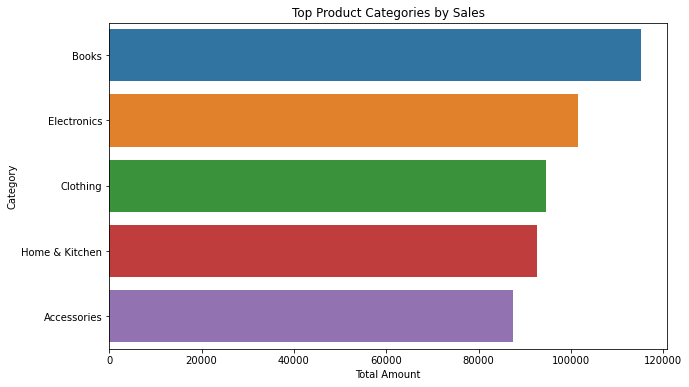

In [14]:
# top performing product categories
category_sales = dataset.groupby('Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()

# plotting top product categories
plt.figure(figsize=(10,6))
sns.barplot(x='Total Amount', y='Category', data=category_sales)
plt.title('Top Product Categories by Sales')
plt.show()

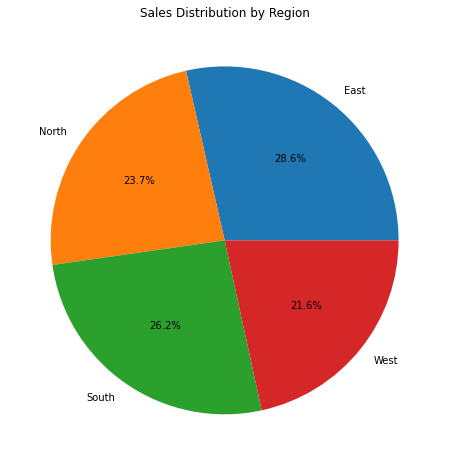

In [15]:
# sales by region
region_sales = dataset.groupby('Region')['Total Amount'].sum().reset_index()

# plotting regional sales distribution
plt.figure(figsize=(8,8))
plt.pie(region_sales['Total Amount'], labels=region_sales['Region'], autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.show()

# Saving the File

In [16]:
# saving the updated dataset
dataset.to_csv('sales_data_updated.csv', index=False)